Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Olga Kireeva"
COLLABORATORS = ""

---

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Часть I. Метод Ньютона нахождения корней уравнения.

Напишите алгоритм, который выполняет итерации Ньютона для заданной функции $f(x)$ с известной производной $f'(x)$. Ваша функция должна находить корни $f(x)$ с заданной точностью $\epsilon$.

In [3]:
def newton_iteration(f, fder, x0, eps=1e-5, maxiter=100):
    """Нахождение корней $f(x) = 0$ через итерации Ньютона.
    
    Parameters
    ----------
    f : callable
        Функция, корни которой мы хотим найти.
    fder : callable
        Производная `f`.
    x0 : float
        Начальное приближение итераций Ньютона.
    eps : float
        Заданная точность. 
        Алгоритм прекращает работу когда расстояние между последовательными приближениями меньше `eps`.
        По умолчанию 1e-5.
    maxiter : int
        Максимальное число итераций (по умолчанию 100).
        Алгоритм прекращается, когда число итераций достигает `maxiter`.
        Этот параметр нужен лишь для предотвращения бесконечного зацикливания.
    
    Returns
    -------
    x : float
        Найденное приближение к корню.
    niter : int
        Количество итераций.
    """
    maxiter = int(maxiter)
    x = x0
    for i in range(maxiter):
        x1 = x - f(x) / fder(x)
        niter = i
        if (abs(x - x1) <= eps):
            break
        x = x1     
    return x1, niter

In [4]:
from numpy.testing import assert_allclose

xx, nit = newton_iteration(lambda x: x**2 - 1, lambda x: 2.*x, x0=4)
assert_allclose(xx, 1.0, atol=1e-5)
assert nit < 10

xx, nit = newton_iteration(lambda x: x**2 - 1, lambda x: 2.*x, x0=-4)
assert_allclose(xx, -1.0, atol=1e-5)
assert nit < 10


from math import log, exp

xx, nit = newton_iteration(lambda x: exp(x)-2, lambda x: exp(x), x0=4, eps=1e-10)
assert_allclose(xx, log(2), atol=1e-10)

Используя функцию `newton_iteration` для функции $f(x) = x^2 - 1$, постройте зависимость логарифма ошибки нахождения корня методом Ньютона от числа итераций. Какова сходимость метода (линейная, квадратичная, иная)?

### Your code here.

In [5]:
def mist(iters):
    res = []
    for i in iters:
        mis = float(abs(-1 + abs(newton_iteration(lambda x: x**2 - 1, lambda x: 2.*x, -4, 1e-5, i)[0])))
        mis1 = float(abs(-1 + abs(newton_iteration(lambda x: x**2 - 1, lambda x: 2.*x, -4, 1e-5, i)[0])))**2
        mis2 = float(abs(-1 + abs(newton_iteration(lambda x: x**2 - 1, lambda x: 2.*x, -4, 1e-5, i)[0])))**3
        print(int(i))
        print(mis)
        print(mis1)
        print(mis2)
        res.append(math.log(mis))
    return res

1
1.125
1.265625
1.423828125
2
0.2977941176470589
0.08868133650519035
0.02640878035632507
3
0.03416618063656052
0.0011673278992900828
3.988313586924169e-05
4
0.000564381199630537
3.185261384964041e-07
1.797701641582831e-10
5
1.591732348149577e-07
2.5336118681457664e-14
4.0328319681832974e-21
6
1.2656542480726785e-14
1.601880675664417e-28
2.027427082060202e-42
7
1.2656542480726785e-14
1.601880675664417e-28
2.027427082060202e-42
8
1.2656542480726785e-14
1.601880675664417e-28
2.027427082060202e-42
9
1.2656542480726785e-14
1.601880675664417e-28
2.027427082060202e-42
10
1.2656542480726785e-14
1.601880675664417e-28
2.027427082060202e-42


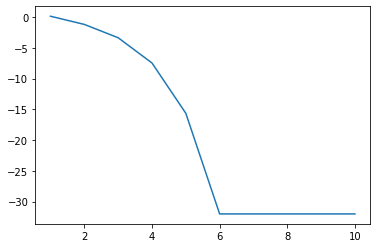

In [6]:
import math
x = np.linspace(1, 10, 10)
plt.plot(x, mist(x))

# Часть II. Модифицированный метод Ньютона для кратных корней.

Рассмотрим функцию, имеющую кратный корень (например, $f(x) = (x^2 - 1)^2$). Реализуйте модифицированную итерацию Ньютона, 

$$
x_{n+1} = x_{n} - m \frac{f(x_n)}{f'(x_n)}
$$

In [7]:
def mod_newton(f, fder, x0, m, eps=1e-5, maxiter=100):
    """Нахождение корней $f(x) = 0$ через итерации Ньютона.
    
    Parameters
    ----------
    f : callable
        Функция, корни которой мы хотим найти.
    fder : callable
        Производная `f`.
    x0 : float
        Начальное приближение итераций Ньютона.
    eps : float
        Заданная точность. 
        Алгоритм прекращает работу когда расстояние между последовательными приближениями меньше `eps`.
        По умолчанию 1e-5.
    maxiter : int
        Максимальное число итераций (по умолчанию 100).
        Алгоритм прекращается, когда число итераций достигает `maxiter`.
        Этот параметр нужен лишь для преcдотвращения бесконечного зацикливания.
    
    Returns
    -------
    x : float
        Найденное приближение к корню.
    niter : int
        Количество итераций.
    """
    maxiter = int(maxiter)
    x = x0
    for i in range(maxiter):
        x1 = x - m * (f(x) / fder(x))
        niter = i
        if (abs(x - x1) <= eps):
            break
        x = x1
    
    return x1, niter

In [8]:
for m in [1, 2, 3, 4, 5, 6]:
    xx, nit = mod_newton(lambda x: (x**2 - 1)**4,
                         lambda x: 4*(x**2 - 1)**3 * 2 * x,
                         x0=2, m=m, maxiter=10000, eps=1e-9)
    
    assert_allclose(xx, 1.0, atol=1e-8)
    

Используйте модифицированную итерацию Ньютона для функции $f(x) = (x^2 - 1)^2$ со значениями  $m= 1, 2, 3, 4, 5, 6$. Сколько итераций требуется для достижения сходимости с фиксированным значением $\epsilon$? Согласуются ли ваши наблюдения с предсказанием о квадратичной сходимости метода при значении $m$ равном кратности корня, и линейной сходимости для остальных значений $m$?

### Your code here.

In [9]:
for m in [1, 2, 3, 4, 5, 6]:
    xx, nit = mod_newton(lambda x: (x ** 2 - 1) ** 2, lambda x: 4 * x * (x ** 2 - 1), x0 = 2, m = m, maxiter = 10000, eps = 1e-9)
    print("for m:", m , "iterations needed: ",nit)

for m: 1 iterations needed:  30
for m: 2 iterations needed:  5
for m: 3 iterations needed:  29
for m: 4 iterations needed:  9999
for m: 5 iterations needed:  9999
for m: 6 iterations needed:  9999


In [10]:
def mist2(iters, m):
    res = []
    for i in range(1,iters):
        mis = float(abs(1 - mod_newton(lambda x: (x ** 2 - 1) ** 2, lambda x: 4 * x * (x ** 2 - 1), 2, m, 1e-9, i)[0]))
        mis1 = float(abs(1 - mod_newton(lambda x: (x ** 2 - 1) ** 2, lambda x: 4 * x * (x ** 2 - 1), 2, m, 1e-9, i)[0])) ** 2
        mis2 = float(abs(1 - mod_newton(lambda x: (x ** 2 - 1) ** 2, lambda x: 4 * x * (x ** 2 - 1), 2, m, 1e-9, i)[0])) ** 3
        print(int(i))
        print(mis)
        print(mis1)
        print(mis2)
        res.append(mis)
    return res

In [12]:
for m in [1, 2, 3, 4, 5, 6]:
    print("m = ", m)
    print("\n")
    mist2(20, m)
print("При m = 2(кратность корней) - сходимость квадратичная.\nПри m = 1, 3 - сходимость линейная\nПри m = 4, 5, 6 - сходимость отсутствует. ")

m =  1


1
0.625
0.390625
0.244140625
2
0.37259615384615374
0.13882789386094668
0.05172673929915079
3
0.21158371783645413
0.04476766965349624
0.009472109984160938
4
0.11502928696270409
0.013231736859148125
0.0015220372561859387
5
0.0604813227008707
0.003657990395646857
0.00022124009755580327
6
0.031103003363760706
0.0009673968182461098
3.0088946492000156e-05
7
0.01578605555649082
0.00024919955003261464
3.933877941467368e-06
8
0.007954359480100592
6.327183473866617e-05
5.032869184768672e-07
9
0.003992872869938546
1.5943033755491284e-05
6.36585069468156e-08
10
0.0020004063420737683
4.001625533408954e-06
8.004877095635598e-09
11
0.0010012015801961205
1.0024046041872088e-06
1.0036090737081e-09
12
0.0005008511405977245
2.508518650380416e-07
1.256394427253696e-10
13
0.0002504882518710172
6.274436432539816e-08
1.5716726134627198e-11
14
0.00012525980809829917
1.5690019524822735e-08
1.965328834737863e-12
15
6.263382606275236e-05
3.922996167259117e-09
2.457122595849517e-13
16
3.1317893719018386e

# Часть III. Метод Ньютона для системы нелинейных уравнений.

Напишите алгоритм, который выполняет итерации Ньютона для заданной системы нелинейных уравнений $\vec{f}(x) = 0$ с известной матрицей Якоби $J(x)$. Ваша функция должна находить корни вектор-функции $\vec{f}(x)$ с заданной точностью $\epsilon$.

In [13]:
def newton_system(F, jcb, X0, eps=1e-5, maxiter=100):
    """Нахождение корней $f(x) = 0$ через итерации Ньютона.
    
    Parameters
    ----------
    F : callable
        Вектор-функция системы, которую мы хотим решить.
    jcb : callable
        Производная `f`.
    X0 : array-like of floats, shape (n,)
        Начальное приближение итераций Ньютона.
    eps : float
        Заданная точность. 
        Алгоритм прекращает работу когда расстояние между последовательными приближениями меньше `eps`.
        По умолчанию 1e-5.
    maxiter : int
        Максимальное число итераций (по умолчанию 100).
        Алгоритм прекращается, когда число итераций достигает `maxiter`.
        Этот параметр нужен лишь для предотвращения бесконечного зацикливания.
    
    Returns
    -------
    X : array-like of floats, shape (n,)
        Найденное приближение к корню.
    niter : int
        Количество итераций.
    """
    maxiter = int(maxiter)
    x = X0
    for i in range(maxiter):
        x1 = x - np.linalg.inv(jcb(x))@F(x)
        iters = i
        if (np.linalg.norm(x - x1) <= eps):
            break
        x = x1
    return x1, iters

In [14]:
from numpy.testing import assert_allclose

def func(X):
    return np.array([X[0]**2 - 2*X[1]**4 + 1, X[0] - X[1]**3 + 1])

def jac(X):
    return np.array([[2.*X[0], -8.*X[1]**3],
                       [1., -3.*X[1]**2]])

xx, nit = newton_system(func, jac, np.array([3., 2.]))
assert_allclose(xx, np.array([4.02879487, 1.71325223]), atol=1e-5)
assert nit < 10

xx, nit = newton_system(func, jac, np.asarray([1., 2.]))
assert_allclose(xx, np.asarray([-0.35119943,  0.86570596]), atol=1e-5)
assert nit < 10

